# K-means clustering

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
%pip install yellowbrick plotly nbformat


### Step 1 : Read the Dataset

In [3]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Customer Segmentation - I want to categorise similar customers together

### Step 2 : Perform basic data quality check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Spending,0


In [6]:
df.duplicated().sum()

0

### Step 3 : Get the X values
Categorize customers according to Age,Income and Spending

In [7]:
x = df.drop(columns=["CustomerID","Gender"])
x.head()


,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Step 4 : Apply preprocessing on X

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [9]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [10]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Train Test split is not required for unsupervised machine learning

### Step 5 : decide the number of clusters by elbow method

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


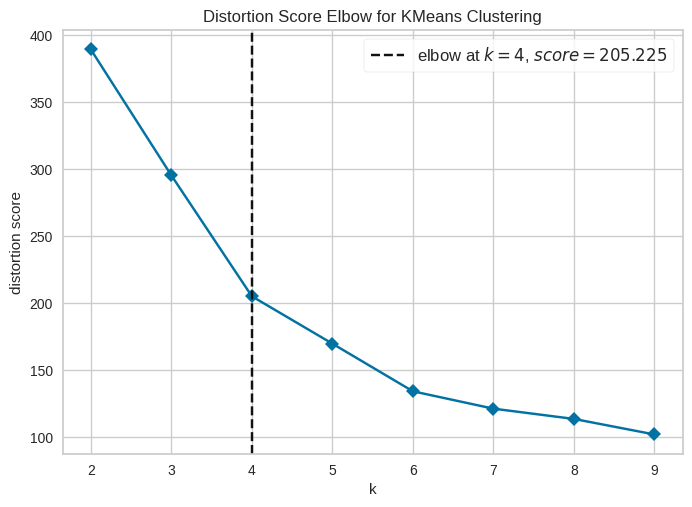

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
model1 = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model1, k=(2,10),timings= False)
visualizer.fit(x_pre)
visualizer.show()

### From above graph it is clear that I need to create 4 clusters

In [50]:
km_model = KMeans(n_clusters=5)
km_model.fit(x_pre)

KMeans(n_clusters=5)

In [51]:
labels1 = km_model.labels_
labels1

array([0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 3, 3, 1, 3, 4, 3, 4, 3, 4, 3,
       1, 3, 1, 3, 4, 3, 1, 3, 4, 3, 1, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int32)

In [52]:
res1= x.copy()
res1["Labels"] = labels1
res1

,Age,Income,Spending,Labels
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,3
196,45,126,28,4
197,32,126,74,3
198,32,137,18,4


In [53]:
res1.query("Labels == 0")

,Age,Income,Spending,Labels
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
4,31,17,40,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0


In [54]:
for i in range(5):
  print(f"Cluster : {i}\n")
  display(res1.query(f"Labels == {i}"))

Cluster : 0



,Age,Income,Spending,Labels
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
4,31,17,40,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0


Cluster : 1



,Age,Income,Spending,Labels
2,20,16,6,1
6,35,18,6,1
14,37,20,13,1
16,35,21,35,1
20,35,24,35,1
38,36,37,26,1
47,27,40,47,1
48,29,40,42,1
49,31,40,42,1
52,31,43,54,1


Cluster : 2



,Age,Income,Spending,Labels
8,64,19,3,2
10,67,19,14,2
12,58,20,15,2
18,52,23,29,2
22,46,25,5,2
24,54,28,14,2
26,45,28,32,2
28,40,29,31,2
30,60,30,4,2
32,53,33,4,2


Cluster : 3



,Age,Income,Spending,Labels
122,40,69,58,3
123,39,69,91,3
125,31,70,77,3
127,40,71,95,3
129,38,71,75,3
131,39,71,75,3
133,31,72,71,3
135,29,73,88,3
137,32,73,73,3
139,35,74,72,3


Cluster : 4



,Age,Income,Spending,Labels
126,43,71,35,4
128,59,71,11,4
130,47,71,9,4
136,44,73,7,4
140,57,75,5,4
146,48,77,36,4
148,34,78,22,4
150,43,78,17,4
152,44,78,20,4
154,47,78,16,4


### Plotting above results

In [55]:
import plotly.express as px

In [56]:
fig = px.scatter_3d(res1,x = "Age",y = "Income", z = "Spending",color = "Labels")
fig.show()

### Aglomarative clustering

In [57]:
from sklearn.cluster import AgglomerativeClustering

In [58]:
ag_model = AgglomerativeClustering(n_clusters=5)
ag_model.fit(x_pre)

AgglomerativeClustering(n_clusters=5)

In [59]:
labels2 = ag_model.labels_
labels2

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [60]:
res_ag = x.copy()
res_ag["Labels"] = labels2
res_ag

,Age,Income,Spending,Labels
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [61]:
for i in range(5):
  print(f"Cluster : {i}\n")
  display(res_ag.query(f"Labels == {i}"))

Cluster : 0



,Age,Income,Spending,Labels
1,21,15,81,0
3,23,16,77,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
...,...,...,...,...
134,20,73,5,0
138,19,74,10,0
142,28,76,40,0
144,25,77,12,0


Cluster : 1



,Age,Income,Spending,Labels
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1


Cluster : 2



,Age,Income,Spending,Labels
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2


Cluster : 3



,Age,Income,Spending,Labels
128,59,71,11,3
130,47,71,9,3
136,44,73,7,3
140,57,75,5,3
148,34,78,22,3
150,43,78,17,3
152,44,78,20,3
154,47,78,16,3
156,37,78,1,3
158,34,78,1,3


Cluster : 4



,Age,Income,Spending,Labels
0,19,15,39,4
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4


In [62]:
fig2 = px.scatter_3d(data_frame= res_ag,x = "Age",y = "Income", z = "Spending",color = "Labels")
fig